In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('score.csv')


In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


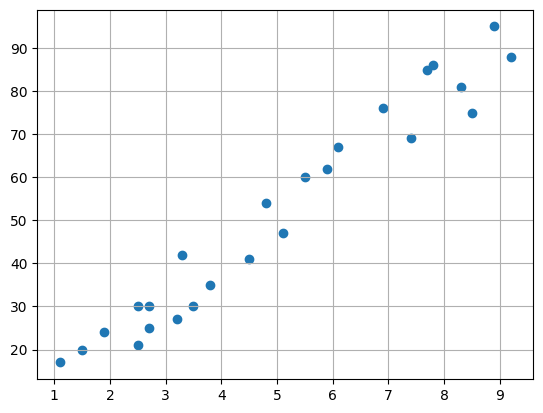

In [4]:
x = df['Hours']
y = df['Scores']
plt.scatter(x, y)
plt.grid(True)
plt.show()


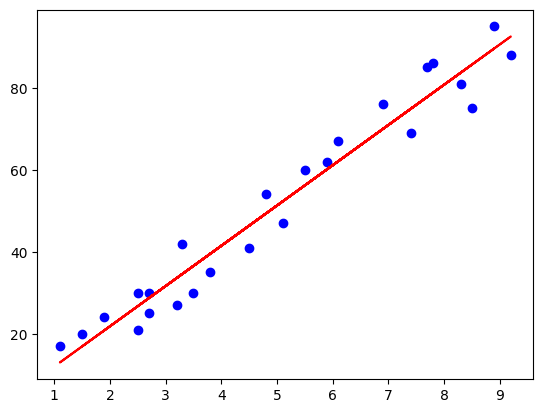

9.821094032679875 2.203089956559154


In [11]:
def loss_function(m, b, points):
    total_error = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        total_error+= (y-(m*x+b))**2

    return total_error/float(n)

def gradient_descent(m_now, b_now, L, points):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        m_gradient+=-(2/n)*x*(y-(m_now*x+b_now))
        b_gradient+=-(2/n)*(y - (m_now*x + b_now))

    m = m_now - L*m_gradient
    b = b_now - L*b_gradient
    return m,b

m = 0
b = 0
L = 0.001
epochs = 3000
for i in range(epochs):
    m, b = gradient_descent(m, b, L, df)

l = []

for i in range(len(df)):
    x = df.iloc[i].Hours
    l.append(m*x+b)

plt.scatter(df.Hours, df.Scores, color = 'b')
plt.plot(df.Hours, l, color = 'r')
plt.show()

print(m ,b)



In [10]:
mse = loss_function(m,b, df)
print(mse)

28.898157817836918


9.775803390787473
2.4836734053731817


np.float64(0.9529481969048358)

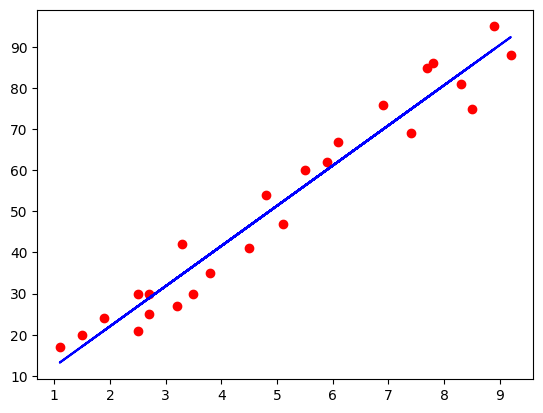

In [40]:
from  scipy import stats


X = df['Hours']
Y = df['Scores']
slope, intercept, r, p, std_err = stats.linregress(X, Y)
print(slope)
print(intercept)
def lineplot(slope, intercept, X):
    return slope*X + intercept

lineplot1 = lineplot(slope, intercept, X)
plt.plot(X, lineplot1, color = 'b')
plt.scatter(X, Y, color = 'r')

r**2
